In [2]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline


from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

warnings.simplefilter('ignore')

# Data load

In [3]:
# load the datasets
train =  pd.read_csv('train.csv', nrows = 100000)
test = pd.read_csv('test.csv', nrows = 100000)
destinations = pd.read_csv('destinations.csv', nrows = 100000)
#train = train.sample(frac=0.01, random_state=99)
#test = test.sample(frac=0.01, random_state=99)
#destinations = destinations.sample(frac=0.01, random_state=99)
train.shape

(100000, 24)

# Exploratory Data Analysis

In [4]:
#data 
train.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21


In [5]:
# data info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date_time                  100000 non-null  object 
 1   site_name                  100000 non-null  int64  
 2   posa_continent             100000 non-null  int64  
 3   user_location_country      100000 non-null  int64  
 4   user_location_region       100000 non-null  int64  
 5   user_location_city         100000 non-null  int64  
 6   orig_destination_distance  63078 non-null   float64
 7   user_id                    100000 non-null  int64  
 8   is_mobile                  100000 non-null  int64  
 9   is_package                 100000 non-null  int64  
 10  channel                    100000 non-null  int64  
 11  srch_ci                    99929 non-null   object 
 12  srch_co                    99929 non-null   object 
 13  srch_adults_cnt            100

In [27]:
#data description
train.describe(include='all')

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,...,hotel_continent,hotel_country,hotel_market,hotel_cluster,date_time_year,date_time_month,srch_ci_year,srch_ci_month,srch_co_year,srch_co_month
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,9.10014,2.637850,84.531040,311.630930,28465.223540,1897.609161,195700.878390,0.138030,0.260470,5.760540,...,3.206530,80.972620,597.559610,49.74576,2013.722840,7.147610,2013.867250,7.193880,2013.890020,7.035060
std,12.09091,0.751001,54.320574,209.399151,16822.922817,1686.819919,110173.879786,0.344933,0.438893,3.771156,...,1.624119,55.679861,507.624672,28.95063,0.447598,3.289822,0.585483,3.377497,0.601771,3.418866
min,2.00000,0.000000,0.000000,0.000000,3.000000,0.005600,12.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,2013.000000,1.000000,2013.000000,1.000000,2013.000000,1.000000
25%,2.00000,3.000000,66.000000,174.000000,13914.000000,725.696800,107548.000000,0.000000,0.000000,2.000000,...,2.000000,50.000000,160.000000,25.00000,2013.000000,4.000000,2014.000000,4.000000,2014.000000,4.000000
50%,2.00000,3.000000,66.000000,311.000000,27733.000000,1897.609161,181983.000000,0.000000,0.000000,9.000000,...,2.000000,50.000000,585.000000,49.00000,2014.000000,7.000000,2014.000000,8.000000,2014.000000,7.000000
75%,11.00000,3.000000,69.000000,385.000000,43113.000000,1897.609161,301357.000000,0.000000,1.000000,9.000000,...,4.000000,106.000000,701.000000,73.00000,2014.000000,10.000000,2014.000000,10.000000,2014.000000,10.000000
max,53.00000,4.000000,239.000000,1025.000000,56495.000000,11641.224200,391007.000000,1.000000,1.000000,10.000000,...,6.000000,212.000000,2117.000000,99.00000,2014.000000,12.000000,2016.000000,12.000000,2016.000000,12.000000


In [7]:
#Check for null values
train. isnull().sum()

date_time                        0
site_name                        0
posa_continent                   0
user_location_country            0
user_location_region             0
user_location_city               0
orig_destination_distance    36922
user_id                          0
is_mobile                        0
is_package                       0
channel                          0
srch_ci                         71
srch_co                         71
srch_adults_cnt                  0
srch_children_cnt                0
srch_rm_cnt                      0
srch_destination_id              0
srch_destination_type_id         0
is_booking                       0
cnt                              0
hotel_continent                  0
hotel_country                    0
hotel_market                     0
hotel_cluster                    0
dtype: int64

In [8]:
# check variables with null values
print(train.orig_destination_distance.value_counts(),'\n\n')
print(train.srch_ci.value_counts(),'\n\n')
print(train.srch_co.value_counts())

2045.7074    130
2048.1557    124
5695.1894     65
2035.1640     45
1553.7679     41
            ... 
1078.5987      1
8044.5673      1
60.4402        1
8577.7547      1
1360.3753      1
Name: orig_destination_distance, Length: 43021, dtype: int64 


2014-12-26    714
2014-12-31    583
2014-12-20    530
2014-10-03    509
2014-12-27    495
             ... 
2015-08-11      1
2015-12-06      1
2015-07-26      1
2015-08-02      1
2015-08-25      1
Name: srch_ci, Length: 1029, dtype: int64 


2015-01-02    659
2014-08-10    582
2015-01-03    571
2014-11-30    566
2015-01-01    541
             ... 
2015-10-31      1
2015-09-30      1
2015-10-03      1
2015-11-01      1
2015-09-18      1
Name: srch_co, Length: 1034, dtype: int64


In [9]:
train. date_time.value_counts()

2014-06-28 08:30:48    3
2013-11-25 22:09:58    3
2014-04-10 13:57:24    3
2014-09-26 14:58:34    2
2014-04-09 10:09:11    2
                      ..
2014-07-12 17:56:55    1
2014-08-12 14:54:24    1
2014-05-11 21:45:27    1
2014-01-23 09:47:12    1
2014-02-11 03:58:19    1
Name: date_time, Length: 99840, dtype: int64

In [10]:
# function to process time varaibles
from datetime import datetime
def get_year(x):
    if x is not None and type(x) is not float:
        try:
            return datetime.strptime(x, '%Y-%m-%d').year
        except ValueError:
            return datetime.strptime(x, '%Y-%m-%d %H:%M:%S').year
    else:
        return 2013
    pass
def get_month(x):
    if x is not None and type(x) is not float:
        try:
            return datetime.strptime(x, '%Y-%m-%d').month
        except:
            return datetime.strptime(x, '%Y-%m-%d %H:%M:%S').month
    else:
        return 1
    pass
    
def left_merge_dataset(left_dframe, right_dframe, merge_column):
    return pd.merge(left_dframe, right_dframe, on=merge_column, how='left')

In [11]:
# process date_time column
train['date_time_year'] = pd.Series(train.date_time, index = train.index)
train['date_time_month'] = pd.Series(train.date_time, index = train.index)
from datetime import datetime
train.date_time_year = train.date_time_year.apply(lambda x: get_year(x))
train.date_time_month = train.date_time_month.apply(lambda x: get_month(x))
del train['date_time']

In [12]:
# process srch_ci column
train['srch_ci_year'] = pd.Series(train.srch_ci, index=train.index)
train['srch_ci_month'] = pd.Series(train.srch_ci, index=train.index)
# convert year & months to int
train.srch_ci_year = train.srch_ci_year.apply(lambda x: get_year(x))
train.srch_ci_month = train.srch_ci_month.apply(lambda x: get_month(x))
# remove the srch_ci column
del train['srch_ci']

In [13]:
# process srch-co column
train['srch_co_year'] = pd.Series(train.srch_co, index=train.index)
train['srch_co_month'] = pd.Series(train.srch_co, index=train.index)
# convert year & months to int
train.srch_co_year = train.srch_co_year.apply(lambda x: get_year(x))
train.srch_co_month = train.srch_co_month.apply(lambda x: get_month(x))
# remove the srch_co column
del train['srch_co']

<AxesSubplot:xlabel='hotel_cluster', ylabel='Density'>

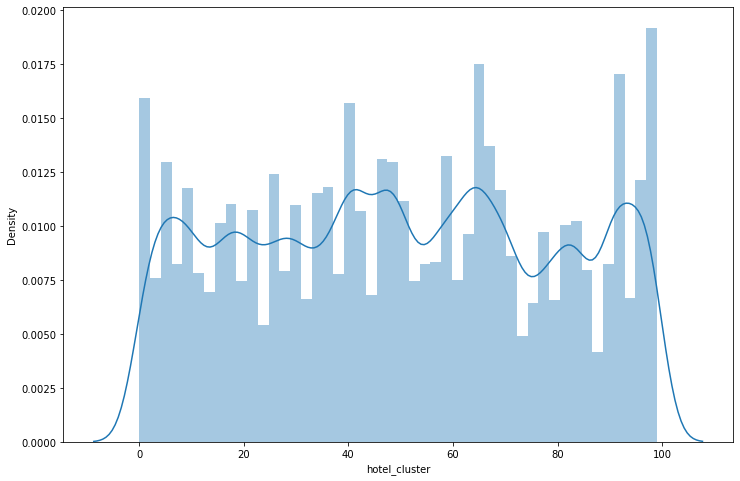

In [14]:
# histogram of hotel cluster variable
plt.figure(figsize = (12,8))
sns.distplot(train['hotel_cluster'])

In [15]:
#Check for null values and imput missing variables 
print(train. isnull().sum(),'\n')
a = train.orig_destination_distance.mean()
train.orig_destination_distance.fillna(a, inplace=True)
print(train. isnull().sum())

site_name                        0
posa_continent                   0
user_location_country            0
user_location_region             0
user_location_city               0
orig_destination_distance    36922
user_id                          0
is_mobile                        0
is_package                       0
channel                          0
srch_adults_cnt                  0
srch_children_cnt                0
srch_rm_cnt                      0
srch_destination_id              0
srch_destination_type_id         0
is_booking                       0
cnt                              0
hotel_continent                  0
hotel_country                    0
hotel_market                     0
hotel_cluster                    0
date_time_year                   0
date_time_month                  0
srch_ci_year                     0
srch_ci_month                    0
srch_co_year                     0
srch_co_month                    0
dtype: int64 

site_name                    0
posa_cont

# Preliminary analysis

<AxesSubplot:>

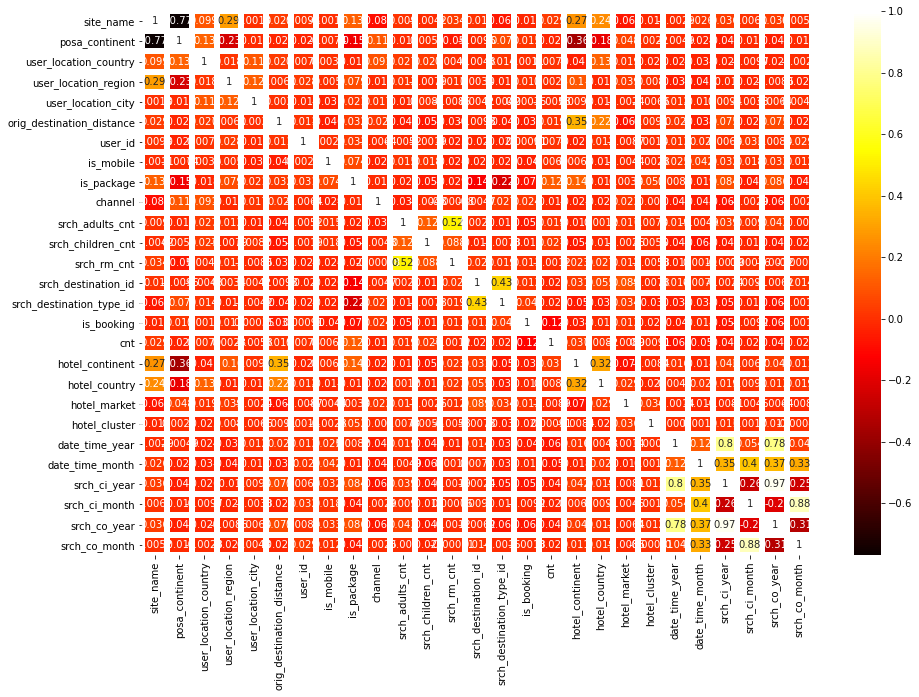

In [16]:
#heat map
fig, ax = plt.subplots()
fig.set_size_inches(15,10)
sns.heatmap(train.corr(),cmap='hot',ax=ax,annot=True,linewidths=5)

In [17]:
#correlation coefficients
train.corr()['hotel_cluster'].sort_values()

srch_destination_type_id    -0.030064
is_booking                  -0.025380
user_location_country       -0.025170
hotel_country               -0.021170
site_name                   -0.019154
hotel_continent             -0.008441
srch_destination_id         -0.007258
user_location_city          -0.006580
channel                     -0.005956
srch_rm_cnt                 -0.005801
is_mobile                   -0.002803
srch_co_month               -0.000413
date_time_year               0.000696
cnt                          0.000914
date_time_month              0.001208
user_id                      0.001396
srch_ci_month                0.001682
posa_continent               0.002204
srch_children_cnt            0.005469
srch_adults_cnt              0.007322
user_location_region         0.008037
orig_destination_distance    0.009103
srch_ci_year                 0.010879
srch_co_year                 0.012014
hotel_market                 0.036107
is_package                   0.051955
hotel_cluste

There is no strong correlation between the other variables and the hotel cluster variable. Therefore, there is no strong relationship between any variable in this dataset and the hotel cluster, suggesting that a linear regression model will be inconclusive. Because none of the variables stand out due to a strong correlation coefficient with the target variable, we will have to adopt a more intuitive approach to choose the variables of importance in this situation. The variables retained are therefore as follows:
- srch_destination_id - ID of the destination where the hotel search was performed
- hotel_country - Country where the hotel is located
- hotel_market - Hotel market
- hotel_cluster - ID of a hotel cluster
- is_package - Whether part of a package or not (1/0)
- is_booking - Booking (1) or Click (0)

In addition, we are collecting the data for the rows where the variable is_booking == 1 seems to be a good idea since we are only interested in reservations.

In [18]:
# Selecting rows for is8booking == 1
train1 = train.loc[train['is_booking'] == 1]

In [19]:
# Let's not merge data from train and destination where is_booking == 1
df = pd.merge(train1,destinations, on='srch_destination_id')
df.head()

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,...,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149
0,2,3,66,348,48862,2234.264100,12,0,1,9,...,-2.384553,-2.345528,-2.396591,-2.399953,-2.388116,-2.394294,-2.400667,-2.398716,-2.386585,-2.39037
1,13,1,46,171,15334,5655.315900,4539,0,0,9,...,-2.384553,-2.345528,-2.396591,-2.399953,-2.388116,-2.394294,-2.400667,-2.398716,-2.386585,-2.39037
2,2,3,66,356,4751,762.231500,6258,0,1,9,...,-2.384553,-2.345528,-2.396591,-2.399953,-2.388116,-2.394294,-2.400667,-2.398716,-2.386585,-2.39037
3,24,2,3,51,41641,1897.609161,14117,0,0,9,...,-2.384553,-2.345528,-2.396591,-2.399953,-2.388116,-2.394294,-2.400667,-2.398716,-2.386585,-2.39037
4,11,3,205,155,14703,996.381100,18999,0,1,9,...,-2.384553,-2.345528,-2.396591,-2.399953,-2.388116,-2.394294,-2.400667,-2.398716,-2.386585,-2.39037


# Models

Split train into a training and test set

In [20]:
X = df[df.columns.difference(['user_id', 'hotel_cluster', 'is_booking'])]
y = df.hotel_cluster
X.shape, y.shape

((8235, 173), (8235,))

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6176, 173) (6176,)
(2059, 173) (2059,)


Check if all the clusters are present in the training 

In [22]:
y.nunique()

100

## Support vector machine

In [23]:
classifier = make_pipeline(preprocessing.StandardScaler(), svm.SVC(decision_function_shape='ovo'))
np.mean(cross_val_score(classifier, X, y, cv=10))

0.09338747065554626

# Naive Bayes 

In [24]:
classifier = make_pipeline(preprocessing.StandardScaler(), GaussianNB(priors=None))
np.mean(cross_val_score(classifier, X, y, cv=10))

0.051365475586594156

# Random Classifier

In [25]:
clf = make_pipeline(preprocessing.StandardScaler(), RandomForestClassifier(n_estimators=173,max_depth=10,random_state=0))
np.mean(cross_val_score(clf, X, y, cv=10))

0.09205192936096922

# K Nearest Neighbor

In [26]:
classifier = make_pipeline(preprocessing.StandardScaler(), KNeighborsClassifier(n_neighbors=5))
np.mean(cross_val_score(classifier, X, y, cv=10, scoring='accuracy'))

0.05975268081492054

# Conclusion

To conclude, none of the four models chosen based on the preliminary analysis results performed well. This is proof that we need to do more feature engineering in order to improve the result.

From the above algorithms, SVM performed the best. Yet, the cross validation score is only 0.09, Which is poor.


Support vector machine(SVM) is a logical choice because this algorithm is capable of classification and regression. Here we have a multi-class (100) problem. SVM brings the benefit of being able to capture more complex relationships between data points. 

Naive Bayes was chosen for its simplicity and speed of convergence. However, unfortunately, it is one of all models that perform the worst. Its simplistic approach is not appropriate in this situation.

A random forest is simply a collection of decision trees whose results are aggregated into one final result. Their ability to limit overfitting without substantially increasing error due to bias is why they are such powerful models. With a score close to that of SVM, it comes in the second position.

K-Nearest Neighbor classifier KNN is a non-parametric, lazy learning algorithm. KNN performed very similar to Naive Bayes for the model in question.


SVM took very long to converge, but we achieved a much better result.